In [80]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# from matplotlib import rc
from IPython.display import display, Image

import os
import operator
import math
import json
import subprocess as sub
import pandas as pd
import numpy as np
import seaborn as sns
from random import shuffle
from textwrap import wrap

# from skbio.stats.composition import closure, clr, ilr, perturb_inv

import sklearn
from sklearn.manifold import TSNE
from scipy.spatial.distance import *
from scipy.stats import levene, ttest_ind, fisher_exact, pearsonr, linregress
from scipy.stats.mstats import gmean

from numpy.linalg import eig, inv
from matplotlib.patches import Ellipse

# https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html


In [81]:
a = 1.
b = 0.1
c = 1.5
d = 0.75
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return np.array([[a -b*X[1],   -b*X[0]     ],
                     [b*d*X[1] ,   -c +b*d*X[0]] ])

In [82]:
X_f0 = np.array([     0. ,  0.])
X_f1 = np.array([ c/(d*b), a/b])
assert all(dX_dt(X_f0) == np.zeros(2) ) and all(dX_dt(X_f1) == np.zeros(2)) # => True
A_f0 = d2X_dt2(X_f0)
print(A_f0)

[[ 1.  -0. ]
 [ 0.  -1.5]]


In [83]:
from scipy import integrate
t = np.linspace(0, 15,  1000)              # time
X0 = np.array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
X = pd.DataFrame(X,columns=['A','B'])
infodict['message']


'Integration successful.'

In [89]:
# from random import s
print(X.shape)

X_sparse = X.copy()
X_sparse[ X_sparse < 4 ] = 0
display(X_sparse.head())

X_noisy = X.copy()
X_noisy = X_noisy*np.random.normal(1,0.1,size=X_noisy.shape)
X_noisy[ X_noisy < 0 ] = 0
display(X_noisy.head())

X_freq = X.copy()
X_freq = X_freq.loc[np.arange(0,len(X),len(X)/10)]
# display(X_freq.tail())

(1000, 2)


,A,B
0,10.000000,5.000000
1,10.075781,4.944220
2,10.152978,4.889483
3,10.231600,4.835777
4,10.311655,4.783087


,A,B
0,11.318878,6.315784
1,12.067403,4.883728
2,11.486831,5.322128
3,10.400748,5.254664
4,10.797791,4.821425


(2, 1000)


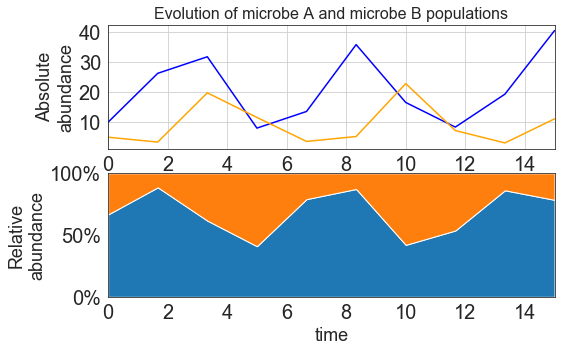

In [93]:
sns.set_style('white')

# with X_sparse as X:
    
# X_ = X
# X_ = X_sparse
# X_ = X_noisy
X_ = X_freq
    
t_ = np.linspace(0,15, len(X_))
X_ra = X_.divide(X_.sum(1),axis=0)
# t_ 

print(X.T.shape)

fig = plt.figure(figsize=(8,5))

ax = plt.subplot(2,1,1)
plt.plot(t_, X_['A'], 'blue', label='A')
plt.plot(t_, X_['B'], 'orange', label='B')
plt.title('Evolution of microbe A and microbe B populations',fontsize=16)
plt.ylabel('Absolute\nabundance',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,15)
plt.grid()

ax = plt.subplot(2,1,2)
plt.stackplot(t_,X_ra.T)
plt.xlabel('time',fontsize=18)
plt.ylabel('Relative\nabundance',fontsize=18)
plt.axis([0,15,0,1])
plt.xticks(np.arange(0,16,2),fontsize=20)
plt.yticks([0,0.5,1], ['0%','50%','100%'],fontsize=20)


plt.show()

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

IndexError: index 2 is out of bounds for axis 0 with size 2